In [83]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn import tree
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.tree import plot_tree
from sklearn import tree

In [22]:
url ="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df=pd.read_csv(url,header=0 )

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [25]:
df.shape

(891, 12)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [28]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [30]:
mode_embarked = df['Embarked'].mode()[0]

In [31]:
df['Embarked'].fillna(mode_embarked, inplace=True)

In [32]:
mode_Cabin = df['Cabin'].mode()[0]
df['Cabin'].fillna(mode_Cabin, inplace=True)

In [33]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

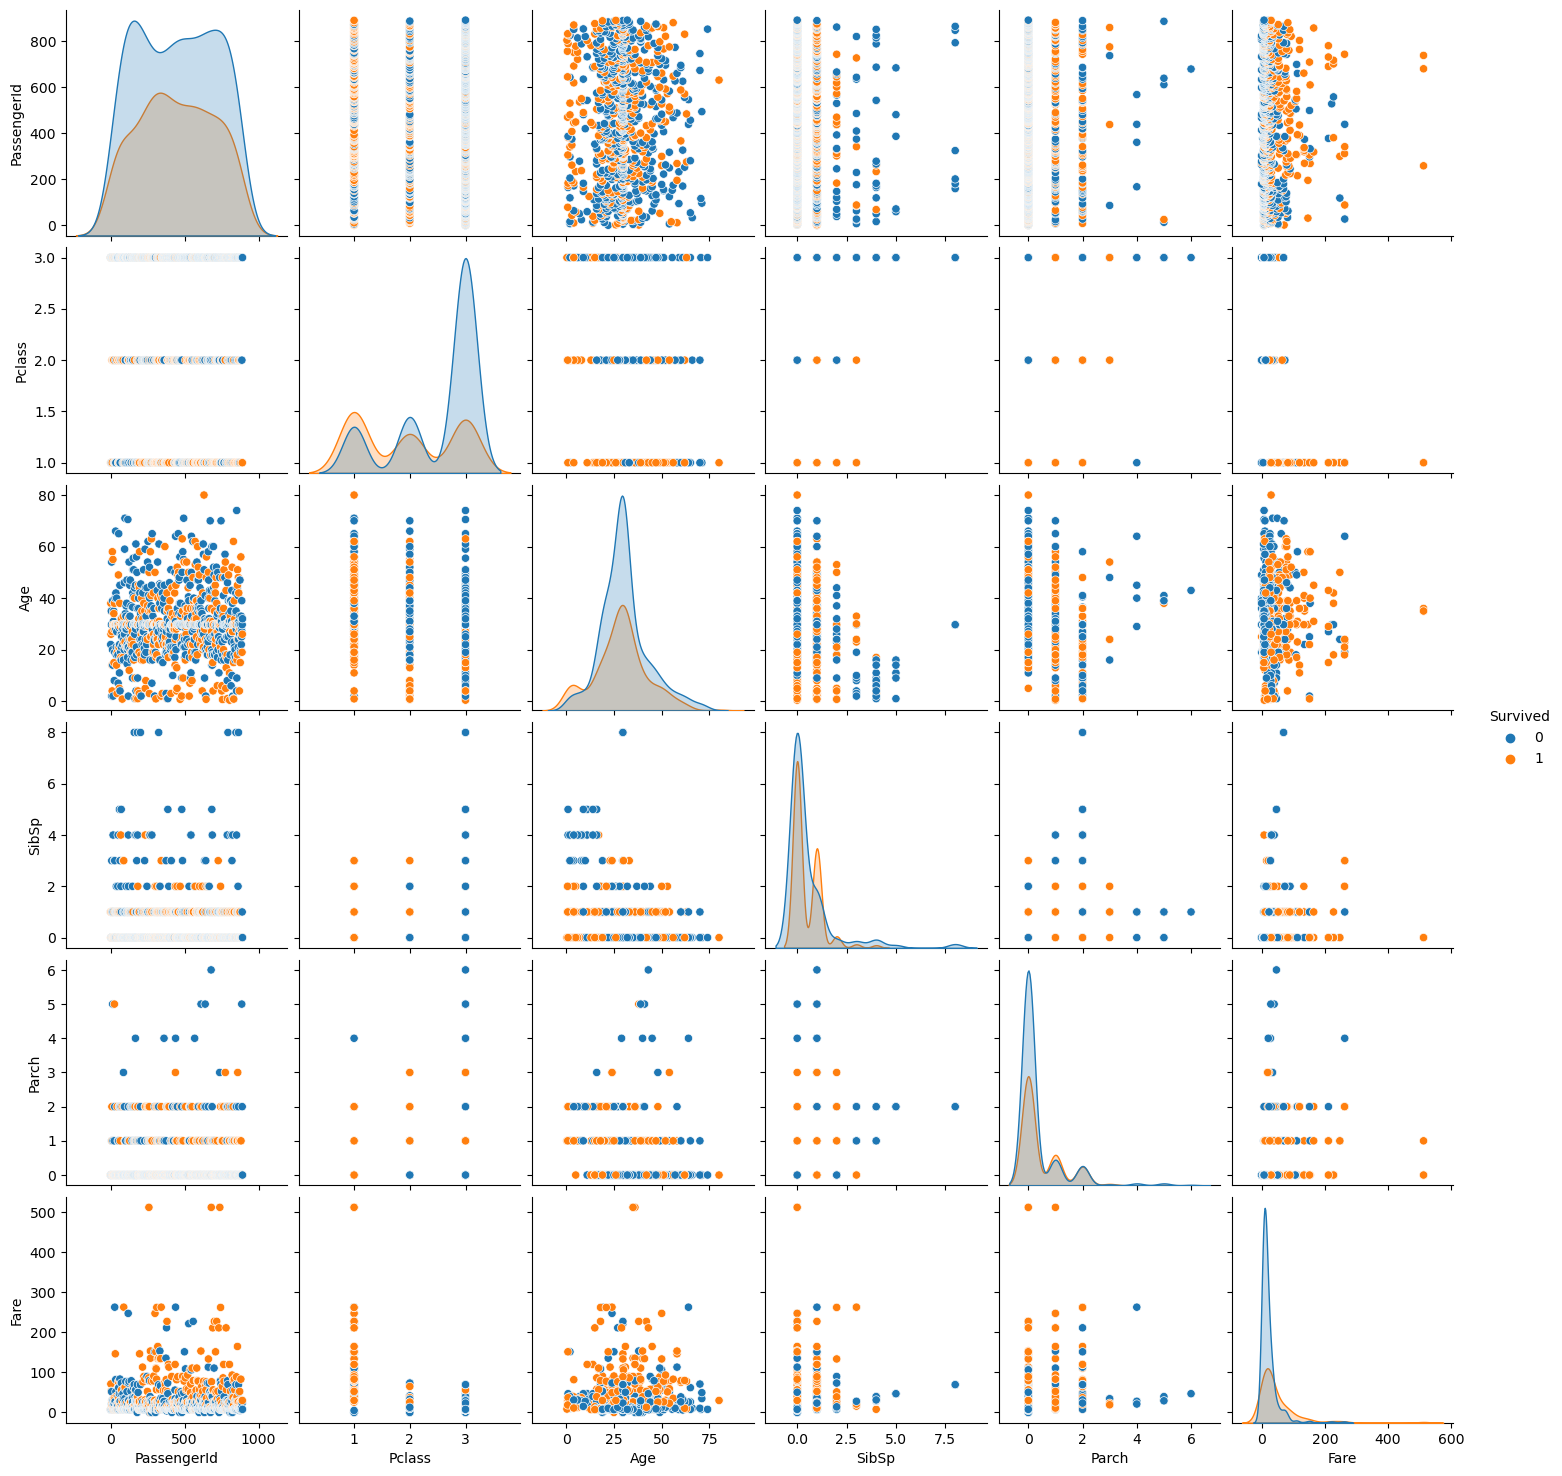

In [41]:
sns.pairplot(df, hue="Survived")
plt.show()

In [62]:
# Convert categorical features to numerical
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

In [63]:
# Split the data into features (X) and target (y)
X = titanic_df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_df['Survived']

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Initialize and train the classifier
classifier = DecisionTreeClassifier(max_depth=3, criterion='gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [68]:
# Predict and evaluate the classifier
y_pred_classifier = classifier.predict(X_test)
accuracy_classifier = accuracy_score(y_test, y_pred_classifier)
print("Decision Tree Classifier Accuracy:", accuracy_classifier)

Decision Tree Classifier Accuracy: 0.8181818181818182


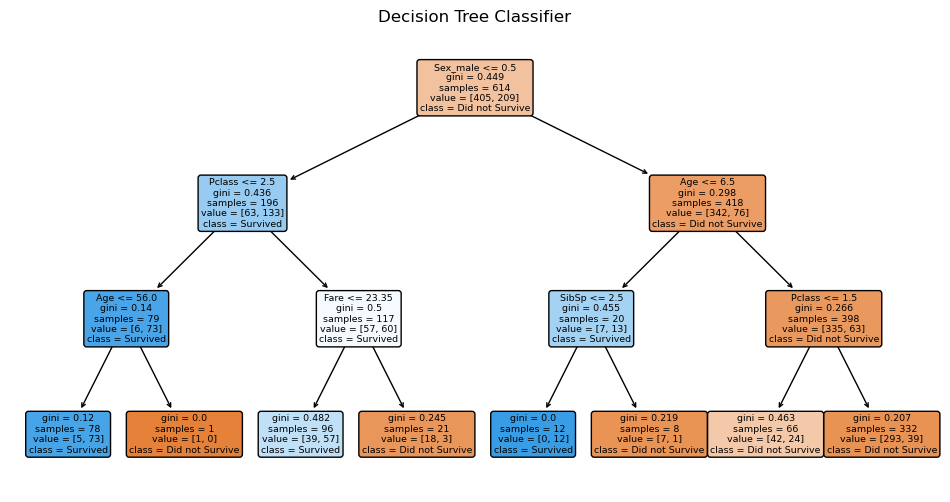

In [85]:
# Decision Tree Classifier Visualization
plt.figure(figsize=(12, 6))
plot_tree(classifier, feature_names=X.columns, class_names=['Did not Survive', 'Survived'], filled=True, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

In [79]:
# Decision Tree Regression

# Split the data into features (X_reg) and target (y_reg)
X_reg = titanic_df.drop(['Fare', 'Name', 'Ticket', 'Cabin'], axis=1)
y_reg = titanic_df['Fare']

In [80]:
# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [81]:
# Initialize and train the regression model
regressor = DecisionTreeRegressor(max_depth=3, criterion='mse')
regressor.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(criterion='mse', max_depth=3)

In [84]:
# Predict and evaluate the regression model
y_pred_reg = regressor.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print("Decision Tree Regression Mean Squared Error:", mse_reg)

Decision Tree Regression Mean Squared Error: 87.23836158190866


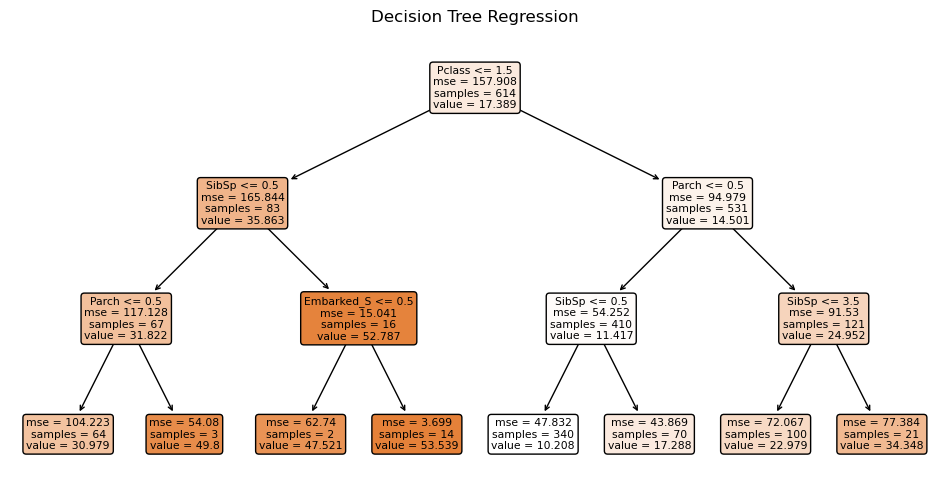

In [86]:
# Decision Tree Regression Visualization
plt.figure(figsize=(12, 6))

plot_tree(regressor, feature_names=X_reg.columns, filled=True, rounded=True)
plt.title("Decision Tree Regression")
plt.show()